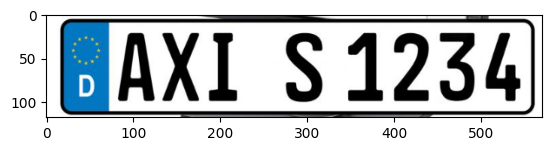

In [118]:
# 실행 파스
import pytesseract
from PIL import Image, ImageOps, ImageEnhance, ImageFilter
from matplotlib import pyplot as plt
import re
# Tesseractの実行ファイルのパスを指定
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

image_path = r"C:\Users\USER\Pictures\Screenshots\스크린샷 2024-08-12 194127.png"
# 画像の読み込み
image = Image.open(image_path)

plt.imshow(image)

In [119]:
# 言語コード 認識
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(image, lang='eng', config=custom_config)
clean_text = re.sub(r'[^\w\s]', '', text)
print(clean_text)

SAXI 1234



In [120]:
# 言語コード 認識
def adjust_spaces(text):
    # 한글 뒤에 공백이 있을 경우, 공백을 한 개로 줄입니다.
    text = re.sub(r'([가-힣])\s+', r'\1 ', text)
    
    # 문장에서 한글 뒤를 제외한 모든 공백을 제거합니다.
    text = re.sub(r'\s+', ' ', text)  # 모든 공백을 하나로 줄입니다.
    text = re.sub(r'(\s)([가-힣])', r'\2', text)  # 한글 앞의 공백 제거
    
    return text.strip()  # 문자열의 앞뒤 공백 제거

custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(image, lang='eng', config=custom_config)
clean_text = re.sub(r'[^\w\s]', '', text)
adjusted_text = adjust_spaces(clean_text)
print(adjusted_text)

SAXI 1234


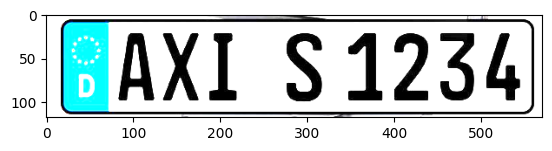

In [121]:
# 明るさを調整（必要に応じて）
brightness_enhancer = ImageEnhance.Brightness(image)
bright_image = brightness_enhancer.enhance(3)  # 明るさを3倍にする

plt.imshow(bright_image, cmap='gray')

In [122]:
# 言語コード 認識
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(bright_image, lang='eng', config=custom_config)
clean_text = re.sub(r'[^\w\s]', '', text)
print(clean_text)

AXI 1234



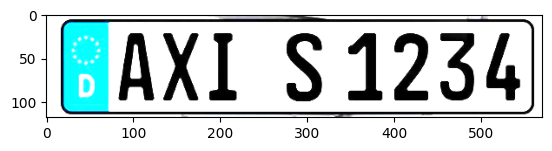

In [123]:
# 画像のノイズを除去
clean_image = bright_image.filter(ImageFilter.MedianFilter())

plt.imshow(clean_image)

In [124]:
# 言語コード 認識
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(clean_image, lang='eng', config=custom_config)
clean_text = re.sub(r'[^\w\s]', '', text)
print(clean_text)

AXI 1234



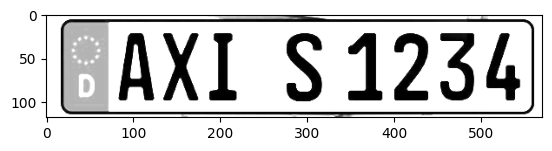

In [125]:
# 画像をグレースケールに変換
gray_image = ImageOps.grayscale(clean_image)

plt.imshow(gray_image, cmap='gray')

In [126]:
# 言語コード 認識
custom_config = r'--oem 3 --psm 6'
text1 = pytesseract.image_to_string(clean_image, lang='eng', config=custom_config)
clean_text = re.sub(r'[^\w\s]', '', text1)
text = ""
for t in text1:
    if t == "$":
        t = "S"
    text += t
print(clean_text, "text: ", text )

AXI 1234
 text:  AXI S1234



In [127]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 画像を読み込む
image = cv2.imread(image_path)

# グレースケールに変換
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ノイズ除去 (median blur)
blurred = cv2.medianBlur(gray, 5)

# 二値化
_, thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)

# モルフォロジー変換で点を除去
kernel = np.ones((5,5), np.uint8)
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# 結果を表示
plt.subplot(1, 3, 1), plt.imshow(gray, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(thresh, cmap='gray'), plt.title('Thresholded Image')
plt.subplot(1, 3, 3), plt.imshow(cleaned, cmap='gray'), plt.title('Cleaned Image')
plt.show()

# 結果を保存
cv2.imwrite('cleaned_image.png', cleaned)


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
# 言語コード 認識
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string('cleaned_image.png', lang='kor', config=custom_config)
clean_text = re.sub(r'[^\w\s]', '', text)
print(clean_text)